## Домашнее задание

## 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


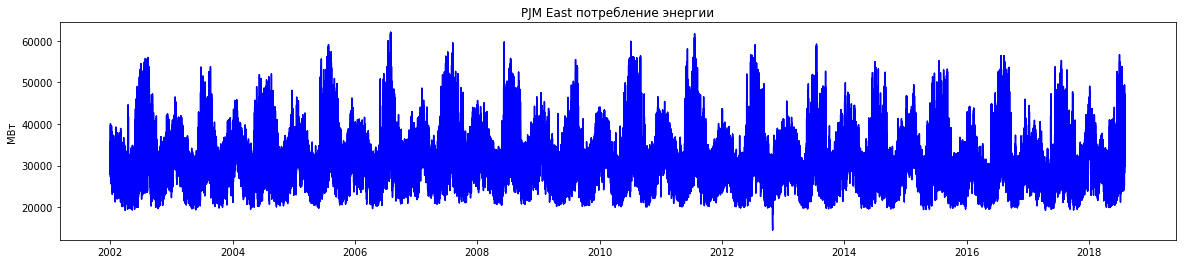

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
data_w = data.resample('W').mean()

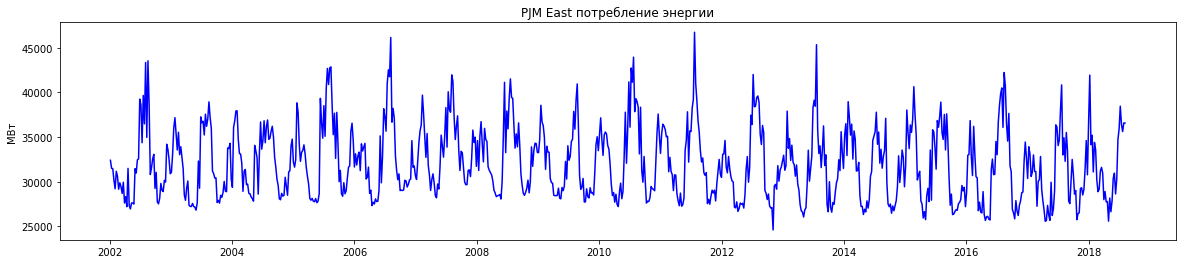

In [5]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index, data_w['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

## 2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

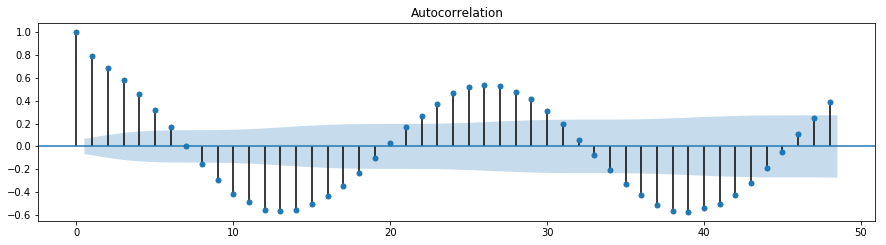

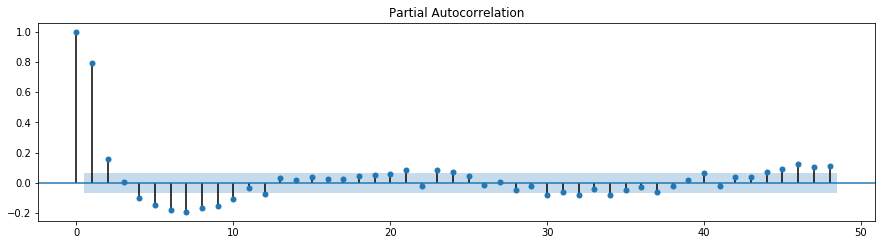

In [6]:
plt.figure(figsize(15, 8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values.squeeze(), lags=48, ax=ax)
pylab.show()

Удаляем вспомогательные столбцы и генерируем новые, так как ресемплинг усреднил не только PJME_MW, но и year и т.д.

In [7]:
data_w.drop(columns = ['dayofmonth', 'dayofyear', 'dayofweek', 'hour', 'is_holiday'], inplace = True)

In [8]:
data_w.drop(columns = ['is_prev_holiday', 'is_next_holiday', 'year', 'month', 'quarter', 'weekofyear'], inplace = True)

In [9]:
data_w['date'] = data_w.index

In [10]:
data_w['year'] = data_w['date'].dt.year
data_w['month'] = data_w['date'].dt.month
data_w['quarter'] = data_w['date'].dt.quarter
data_w['weekofyear'] = data_w['date'].dt.weekofyear

In [11]:
data_w.drop(columns = ['date'], inplace=True)

In [12]:
data_w

,PJME_MW,year,month,quarter,weekofyear
Date,,,,,
2002-01-06,32392.160839,2002,1,1,1
2002-01-13,31487.386905,2002,1,1,2
2002-01-20,31452.880952,2002,1,1,3
2002-01-27,30141.529762,2002,1,1,4
2002-02-03,29196.488095,2002,2,1,5
...,...,...,...,...,...
2018-07-08,38459.982143,2018,7,3,27
2018-07-15,36420.035714,2018,7,3,28
2018-07-22,35612.095238,2018,7,3,29


### Добавляем новые признаки

Первые разности

In [13]:
data_w['first_diff'] = (data_w.PJME_MW - data_w.PJME_MW.shift(1)).fillna(0)

Скользящее среднее

In [14]:
data_w['window_6']=data_w['PJME_MW'].rolling(window=6).mean()

In [15]:
data_w

,PJME_MW,year,month,quarter,weekofyear,first_diff,window_6
Date,,,,,,,
2002-01-06,32392.160839,2002,1,1,1,0.000000,NaN
2002-01-13,31487.386905,2002,1,1,2,-904.773934,NaN
2002-01-20,31452.880952,2002,1,1,3,-34.505952,NaN
2002-01-27,30141.529762,2002,1,1,4,-1311.351190,NaN
2002-02-03,29196.488095,2002,2,1,5,-945.041667,NaN
...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018,7,3,27,2548.142857,33160.194444
2018-07-15,36420.035714,2018,7,3,28,-2039.946429,34072.600198
2018-07-22,35612.095238,2018,7,3,29,-807.940476,35238.756944


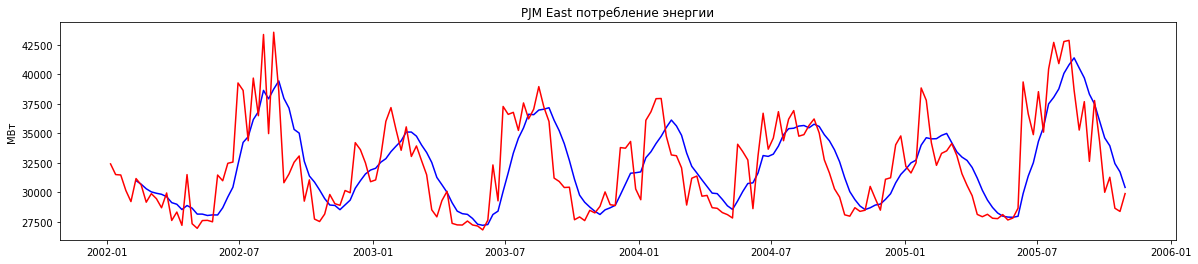

In [16]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index[:200], data_w['window_6'][:200], 'b' )
plt.plot( data_w.index[:200], data_w['PJME_MW'][:200], 'r' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Экспоненциальное сглаживание

In [17]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [18]:
data_w['exp_0_2'] = exponential_smoothing(data_w['PJME_MW'], 0.2)

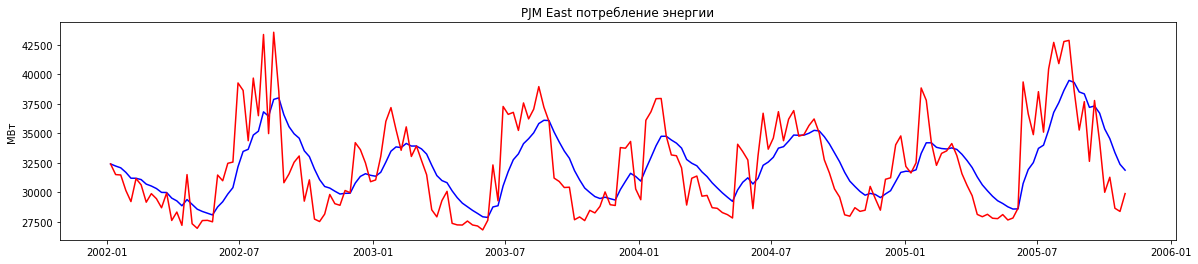

In [19]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index[:200], data_w['exp_0_2'][:200], 'b' )
plt.plot( data_w.index[:200], data_w['PJME_MW'][:200], 'r' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [20]:
data_w['exp_0_005'] = exponential_smoothing(data_w['PJME_MW'], 0.005)

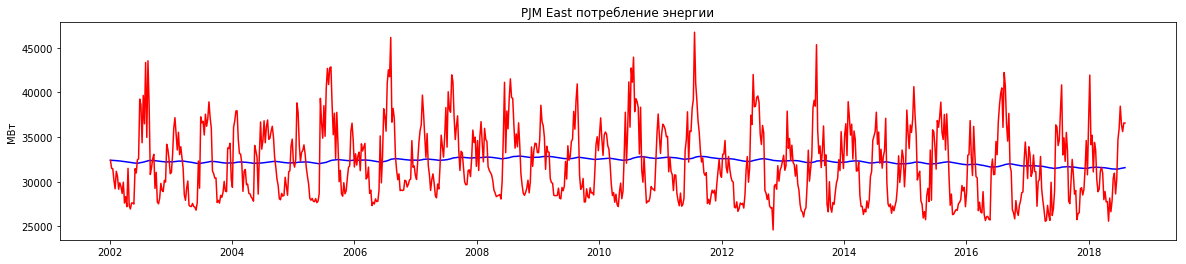

In [21]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index[:1200], data_w['exp_0_005'][:1200], 'b' )
plt.plot( data_w.index[:1200], data_w['PJME_MW'][:1200], 'r' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Добавим истории длиной p=6 в признаках автокорреляции

In [22]:
p = 6
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

Аналогично добавляем первые разности на глубину p=6

In [23]:
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['first_diff'].values[i:-(p)+i]

### Выделение существенных признаков

Удаляем первые p строк

In [24]:
data_w.index[:p]

DatetimeIndex(['2002-01-06', '2002-01-13', '2002-01-20', '2002-01-27',
               '2002-02-03', '2002-02-10'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [25]:
data_w.head(7)

,PJME_MW,year,month,quarter,weekofyear,first_diff,window_6,exp_0_2,exp_0_005,t6,...,t4,t3,t2,t1,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002,1,1,1,0.000000,NaN,32392.160839,32392.160839,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,2002,1,1,2,-904.773934,NaN,32211.206052,32387.636969,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,2002,1,1,3,-34.505952,NaN,32059.541032,32382.963189,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,2002,1,1,4,-1311.351190,NaN,31675.938778,32371.756022,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,2002,2,1,5,-945.041667,NaN,31180.048642,32355.879683,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2002,2,1,6,1954.029762,30970.160735,31174.142485,32349.852874,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2002,2,1,7,-533.952381,30674.228175,31062.627083,32341.186437,32392,...,31452,30141,29196,31150,0,-904,-34,-1311,-945,1954


In [26]:
data_w.drop(data_w.index[:p], inplace = True)

In [27]:
data_w

,PJME_MW,year,month,quarter,weekofyear,first_diff,window_6,exp_0_2,exp_0_005,t6,...,t4,t3,t2,t1,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-02-17,30616.565476,2002,2,1,7,-533.952381,30674.228175,31062.627083,32341.186437,32392,...,31452,30141,29196,31150,0,-904,-34,-1311,-945,1954
2002-02-24,29144.130952,2002,2,1,8,-1472.434524,30283.685516,30678.927857,32325.201159,31487,...,30141,29196,31150,30616,-904,-34,-1311,-945,1954,-533
2002-03-03,29869.011905,2002,3,1,9,724.880952,30019.707341,30516.944666,32312.920213,31452,...,29196,31150,30616,29144,-34,-1311,-945,1954,-533,-1472
2002-03-10,29440.910714,2002,3,1,10,-428.101190,29902.937500,30301.737876,32298.560165,30141,...,31150,30616,29144,29869,-1311,-945,1954,-533,-1472,724
2002-03-17,28672.779762,2002,3,1,11,-768.130952,29815.652778,29975.946253,32280.431263,29196,...,30616,29144,29869,29440,-945,1954,-533,-1472,724,-428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018,7,3,27,2548.142857,33160.194444,32842.177681,31469.850815,30382,...,28615,30316,34711,35911,2528,563,-2330,1701,4394,1200
2018-07-15,36420.035714,2018,7,3,28,-2039.946429,34072.600198,33557.749288,31494.601740,30945,...,30316,34711,35911,38459,563,-2330,1701,4394,1200,2548
2018-07-22,35612.095238,2018,7,3,29,-807.940476,35238.756944,33968.618478,31515.189207,28615,...,34711,35911,38459,36420,-2330,1701,4394,1200,2548,-2039


Запишем итоговую систему признаков. Горизонт прогнозирования h = 4

In [28]:
scl_target=StandardScaler() 
h=4

In [29]:
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))

In [30]:
y = scl_target.fit_transform(target)
y.shape

(850, 1)

In [31]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(850, 21)

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

#### Одномерные статистики

In [33]:
f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=1.00,  I=0
F-test=0.06,  I=1
F-test=0.01,  I=2
F-test=0.01,  I=3
F-test=0.02,  I=4
F-test=0.18,  I=5
F-test=0.03,  I=6
F-test=0.01,  I=7
F-test=0.00,  I=8
F-test=0.81,  I=9
F-test=0.38,  I=10
F-test=0.10,  I=11
F-test=0.00,  I=12
F-test=0.10,  I=13
F-test=0.43,  I=14
F-test=0.05,  I=15
F-test=0.13,  I=16
F-test=0.20,  I=17
F-test=0.23,  I=18
F-test=0.26,  I=19
F-test=0.23,  I=20


In [34]:
sfk1 =SelectKBest(f_regression, k=5)
X_new1 =sfk1.fit_transform(X, y.ravel())
X_new1.shape

(850, 5)

In [35]:
column_names = data_w.columns[sfk1.get_support()]
column_names

Index(['PJME_MW', 't6', 't5', 't1', 'd2'], dtype='object')

In [36]:
sfk2=SelectKBest(mutual_info_regression, k=5)
X_new2 = sfk2.fit_transform(X, y.ravel())
X_new2.shape

(850, 5)

In [37]:
column_names = data_w.columns[sfk2.get_support()]
column_names

Index(['year', 'month', 'weekofyear', 'exp_0_005', 't6'], dtype='object')

#### Отбор на основе модели

In [38]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(850, 3)

In [39]:
column_names = data_w.columns[sfm.get_support()]
column_names

Index(['PJME_MW', 'weekofyear', 't6'], dtype='object')

In [40]:
list_param_k1 =np.where(sfk1.get_support())[0]
list_param_k2 =np.where(sfk2.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k1 лучших : ',list_param_k1)
print('Номера признаков k2 лучших: ',list_param_k2)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k1 лучших :  [ 0  9 10 14 19]
Номера признаков k2 лучших:  [1 2 4 8 9]
Номера признаков для выбора по модели :  [0 4 9]


In [41]:
list_par_4 = [0,1,2,4,8,9,10,14,19]
#X_new = X[:]

X = data_w.iloc[p:-h,:].values
y = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))

X_new_4 = X[:,list_par_4]
data_w.columns[list_par_4]

Index(['PJME_MW', 'year', 'month', 'weekofyear', 'exp_0_005', 't6', 't5', 't1',
       'd2'],
      dtype='object')

### Разделение данных на тестовые и тренировочные 

In [42]:
# сделаем функцию
def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

Для временного ряда "Потребление энергии" назначим датой разделения 1/06/2016

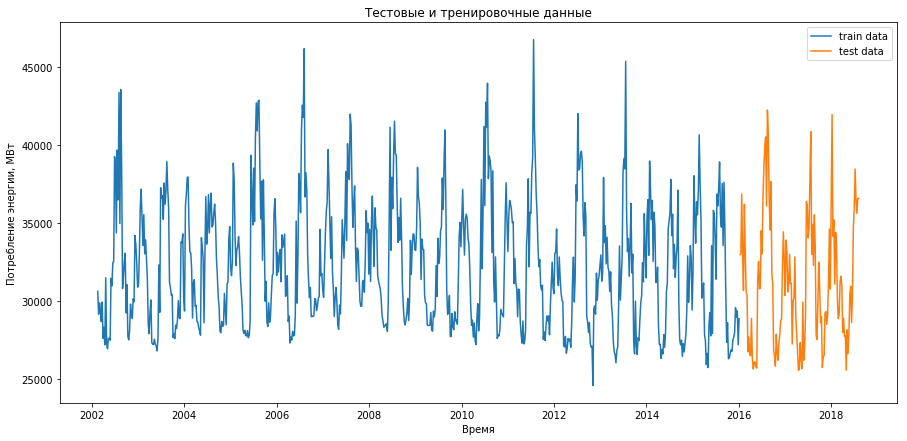

In [43]:
train, test = split_data(data_w, '01-06-2016')

plt.figure( figsize=(15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [44]:
X_train = X_new_4[:train.shape[0],:]
y_train = y[:train.shape[0],0]
X_test = X_new_4[train.shape[0]:,:]
y_test = y[train.shape[0]:,0]

### Строим модель

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
model_g = GradientBoostingRegressor(max_depth=2, random_state=0, n_estimators=60)

In [47]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=60,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### Посмотрим тесты

In [48]:
y_pred = model_g.predict(X_test)

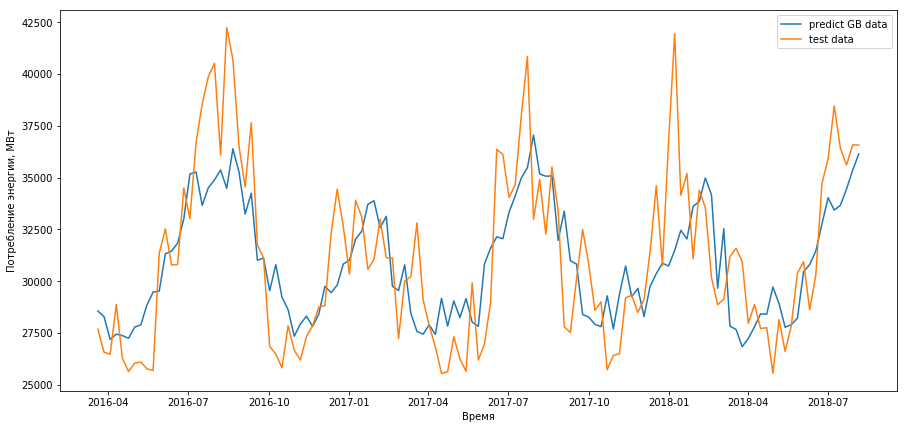

In [49]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_pred, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

**Оценки для сравнения моделей**

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [51]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_pred) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_pred) 
er_r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   7797577.716318006 
ошибка mae  :   2193.7716264524697 
оценка R2 :   0.5461069792249149


Абсолютная процентная ошибка (MAPE). Определять MAPE для масштабированной переменной не верно. Поэтому переведем ответ решателя обратно в состояние без масштаба.

In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
mape = mean_absolute_percentage_error(y_true=y_test,y_pred = y_pred)
print('ошибка градиентного бустинга MAPE :  ', mape,'%')

ошибка градиентного бустинга MAPE :   6.94115606414964 %


Построим более точную модель с использованием поиска моделей. Воспользуемся методом поиска по сетке

In [54]:
from sklearn.model_selection import GridSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#param_dist = {"max_depth": [1, 2, 3], 
#              "n_estimators":[100, 150, 200, 250, 300]}

param_dist = {"max_depth": [1, 2, 3], 
              "n_estimators":[i for i in range(10, 200, 10)]}


#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = GridSearchCV(model_gr, param_grid=param_dist, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.576 (std: 0.054)
Parameters: {'max_depth': 1, 'n_estimators': 190}

Model with rank: 2
Mean validation score: 0.574 (std: 0.053)
Parameters: {'max_depth': 1, 'n_estimators': 180}

Model with rank: 3
Mean validation score: 0.570 (std: 0.053)
Parameters: {'max_depth': 1, 'n_estimators': 170}



C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Выбираем модель с рангом 1. {'n_estimators': 190, 'max_depth': 1} и проведем ее обучение на тренировочном наборе.

In [55]:
# Модель для прямого моделирования на 4 шага вперед
model_step_4 = GradientBoostingRegressor(max_depth=1, n_estimators=160)
model_step_4.fit(X_train, y_train)
y_pred_step_4 = model_step_4.predict(X_test)

mape = mean_absolute_percentage_error(y_true=y_test,y_pred = y_pred_step_4)
print('ошибка градиентного бустинга MAPE :  ', mape,'%')

ошибка градиентного бустинга MAPE :   6.870772936370724 %


## 3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

Запишем итоговую систему признаков. Горизонт прогнозирования h = 1

In [56]:
scl_target=StandardScaler() 
h=1

In [57]:
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))

In [58]:
y = scl_target.fit_transform(target)
y.shape

(853, 1)

In [59]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(853, 21)

#### Одномерные статистики

In [60]:
f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=1.00,  I=0
F-test=0.01,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.02,  I=5
F-test=0.33,  I=6
F-test=0.25,  I=7
F-test=0.01,  I=8
F-test=0.00,  I=9
F-test=0.02,  I=10
F-test=0.07,  I=11
F-test=0.16,  I=12
F-test=0.31,  I=13
F-test=0.53,  I=14
F-test=0.04,  I=15
F-test=0.04,  I=16
F-test=0.04,  I=17
F-test=0.03,  I=18
F-test=0.02,  I=19
F-test=0.02,  I=20


In [61]:
sfk1 =SelectKBest(f_regression, k=5)
X_new1 =sfk1.fit_transform(X, y.ravel())
X_new1.shape

(853, 5)

In [62]:
column_names = data_w.columns[sfk1.get_support()]
column_names

Index(['PJME_MW', 'window_6', 'exp_0_2', 't2', 't1'], dtype='object')

In [63]:
sfk2=SelectKBest(mutual_info_regression, k=5)
X_new2 = sfk2.fit_transform(X, y.ravel())
X_new2.shape

(853, 5)

In [64]:
column_names = data_w.columns[sfk2.get_support()]
column_names

Index(['PJME_MW', 'month', 'weekofyear', 't2', 't1'], dtype='object')

#### Отбор на основе модели

In [65]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(853, 2)

In [66]:
column_names = data_w.columns[sfm.get_support()]
column_names

Index(['PJME_MW', 'weekofyear'], dtype='object')

In [67]:
list_param_k1 =np.where(sfk1.get_support())[0]
list_param_k2 =np.where(sfk2.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k1 лучших : ',list_param_k1)
print('Номера признаков k2 лучших: ',list_param_k2)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k1 лучших :  [ 0  6  7 13 14]
Номера признаков k2 лучших:  [ 0  2  4 13 14]
Номера признаков для выбора по модели :  [0 4]


#### Выделяем значимые признаки (точность повысилась на 0.5 % по MAPE)

In [68]:
list_par_1=[0,2,4,6,7,13,14]
#X_new = X[:]

X = data_w.iloc[p:-h,:].values
y = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))

X_new_1 = X[:,list_par_1]
data_w.columns[list_par_1]

Index(['PJME_MW', 'month', 'weekofyear', 'window_6', 'exp_0_2', 't2', 't1'], dtype='object')

### Разделение данных на тестовые и тренировочные 

In [69]:
X_train = X_new_1[:train.shape[0],:]
y_train = y[:train.shape[0],0]
X_test = X_new_1[train.shape[0]:,:]
y_test = y[train.shape[0]:,0]

### Строим модель

In [70]:
model_g = GradientBoostingRegressor(max_depth=2, random_state=0, n_estimators=60)

In [71]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=60,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### Посмотрим тесты

In [72]:
y_test_pred_g = model_g.predict(X_test)

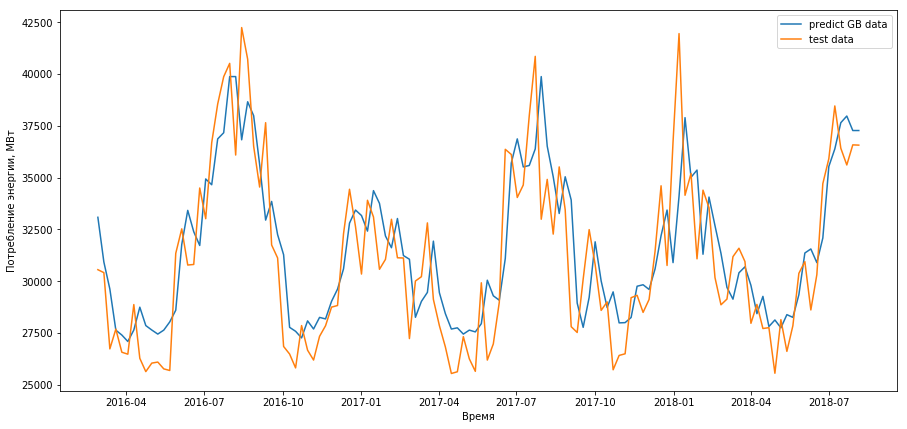

In [73]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

**Оценки для сравнения моделей**

In [74]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)
print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   5751972.181200465 
ошибка mae  :   1924.3548177866337 
оценка R2 :   0.6602516322095553


In [75]:
er_g = mean_absolute_percentage_error(y_true=y_test, y_pred = y_test_pred_g)
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.161883408307983 %


Построим более точную модель с использованием поиска моделей. Воспользуемся методом поиска по сетке

In [76]:
#param_dist = {"max_depth": [1, 2, 3], 
#              "n_estimators":[100, 150, 200, 250, 300]}

param_dist = {"max_depth": [2], 
              "n_estimators":[i for i in range(10, 200, 10)]}


#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = GridSearchCV(model_gr, param_grid=param_dist, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.692 (std: 0.061)
Parameters: {'max_depth': 2, 'n_estimators': 60}

Model with rank: 2
Mean validation score: 0.692 (std: 0.064)
Parameters: {'max_depth': 2, 'n_estimators': 70}

Model with rank: 3
Mean validation score: 0.692 (std: 0.070)
Parameters: {'max_depth': 2, 'n_estimators': 90}



C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Выбираем модель с рангом 1. {'n_estimators': 100, 'max_depth': 2} и проведем ее обучение на тренировочном наборе.

In [77]:
# Модель для прямого моделирования на 1 шаг вперед
model_step_1 = GradientBoostingRegressor(max_depth=2, n_estimators=100)
model_step_1.fit(X_train, y_train)
y_pred_step_1 = model_step_1.predict(X_test)

mape = mean_absolute_percentage_error(y_true=y_test,y_pred = y_pred_step_1)
print('ошибка градиентного бустинга MAPE :  ', mape,'%')

ошибка градиентного бустинга MAPE :   6.189220908938897 %


## 4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек. 

### Использование модели для предсказания 4*h моментов времени

Продолжим прогноз на 4 недели вперед. Для этого будем использовать результаты прогноза предыдущих предсказаний на неделю вперед.  Необходимо заменять X_test[t+i, 0] = y_test[t+i-1] и продолжить моделирование в новом состоянии. Сделаем 4 недели прогноза.

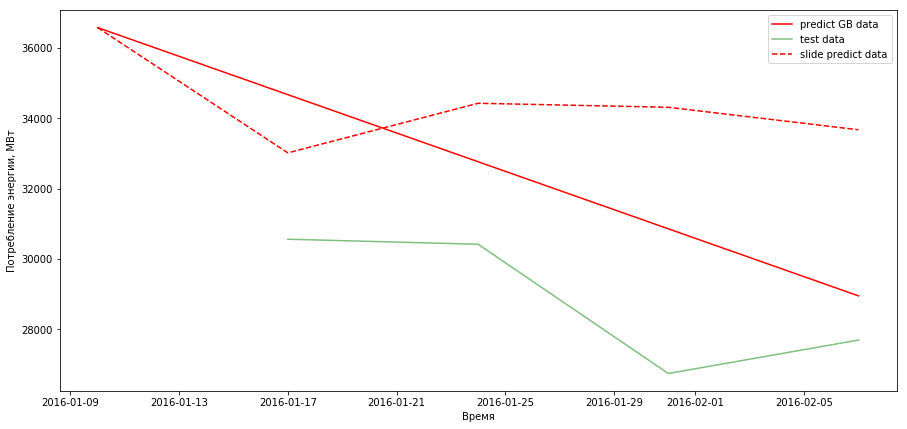

In [107]:
# Колонки, используемые моделью: 'PJME_MW', 'month', 'weekofyear', 'window_6', 'exp_0_2', 't2', 't1'
X_test_slide = X_test.copy()
y_test_slide = y_pred_step_1.copy()
steps = 4
for i in range(steps):
    y_test_slide[i] = model_step_1.predict(X_test_slide[i,:].reshape((1,7)))
    # заполняем вектор для прогноза следующей точки
    # восстанавливаем PJME_MW
    X_test_slide[i+1,0] = y_test_slide[i]
    
    # восстанавливаем month
    X_test_slide[i+1,1] = test.index[i+1].month
    
    # восстанавливаем weekofyear
    X_test_slide[i+1,2] = test.index[i+1].weekofyear
    
    # восстанавливаем exp_0_2
    # 0,2 => меньше берем от нового значения и больше от сглаженного предыдущего
    X_test_slide[i+1,4] = X_test_slide[i+1,0]*(0.2) + (1-0.2) * X_test_slide[i,4]
    
    # восстанавливаем t2 - - PJME_MW две недели назад
    X_test_slide[i+1,5] = X_test_slide[i,6]
    
    # восстанавливаем t1 - PJME_MW наделю назад
    X_test_slide[i+1,6] = X_test_slide[i,0]
    
    if i>p:
        # восстанавливаем window_6
        X_test_slide[i+1,3] = np.mean(X_test_slide[i+1-p:i+1,0]) 
    
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
#plt.plot(test.index[1:steps+1],y_pred_step_1[:steps], 'r',label='predict GB data' )
plt.plot(test.index[[0,4]],[X_test[-1,0]] + [y_pred_step_4[0]], 'r',label='predict GB data' )
plt.plot(test.index[1:steps+1], y_test[:steps], 'g',label='test data', alpha=0.5)
plt.plot(test.index[0:steps+1],[X_test_slide[-1,0]] + y_test_slide[:steps].tolist(), '--r',label='slide predict data')

plt.legend()
plt.show()    

## 5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10*i-й до (i+1)*10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)

In [80]:
# Колонки, используемые моделью: 'PJME_MW', 'month', 'weekofyear', 'window_6', 'exp_0_2', 't2', 't1'
X_test_slide = X_test.copy()
y_test_slide = y_pred_step_1.copy()
steps = 127
for i in range(steps):
    y_test_slide[i] = model_step_1.predict(X_test_slide[i,:].reshape((1,7)))
    # заполняем вектор для прогноза следующей точки
    # восстанавливаем PJME_MW
    X_test_slide[i+1,0] = y_test_slide[i]
    
    # восстанавливаем month
    X_test_slide[i+1,1] = test.index[i+1].month
    
    # восстанавливаем weekofyear
    X_test_slide[i+1,2] = test.index[i+1].weekofyear
    
    # восстанавливаем exp_0_2
    # 0,2 => меньше берем от нового значения и больше от сглаженного предыдущего
    X_test_slide[i+1,4] = X_test_slide[i+1,0]*(0.2) + (1-0.2) * X_test_slide[i,4]
    
    # восстанавливаем t2 - - PJME_MW две недели назад
    X_test_slide[i+1,5] = X_test_slide[i,6]
    
    # восстанавливаем t1 - PJME_MW наделю назад
    X_test_slide[i+1,6] = X_test_slide[i,0]
    
    if i>p:
        # восстанавливаем window_6
        X_test_slide[i+1,3] = np.mean(X_test_slide[i+1-p:i+1,0]) 

In [81]:
mape = []
for i in range(10):
    mape.append(mean_absolute_percentage_error(y_true=y_test[i*10:i*10+10],y_pred = y_test_slide[i*10:i*10+10]))

In [82]:
mape

[18.3579196825631,
 10.727854758745478,
 11.277105467740267,
 24.196941339283985,
 5.314877454556291,
 17.476854322374276,
 14.461454181321995,
 12.887819020542166,
 23.117262008993098,
 9.312607369281967]

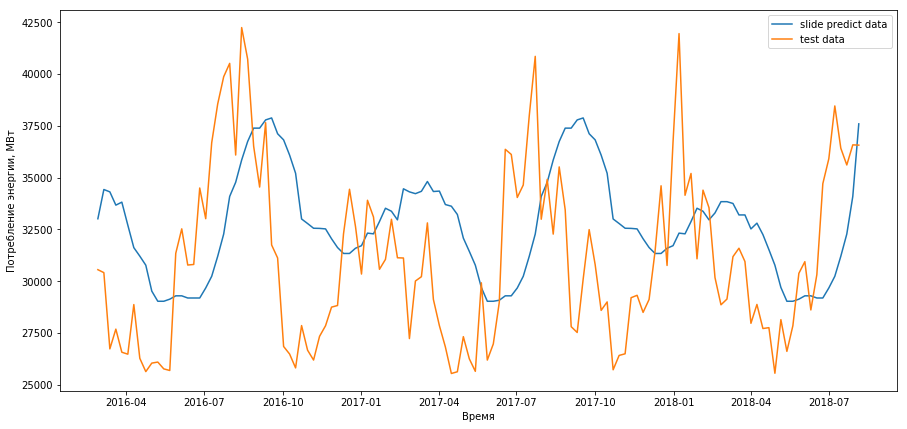

In [83]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_slide, label='slide predict data' )
plt.plot(test.index[h+p:],y_test, label='test data')
#plt.plot(test.index[h+p:],y_pred_step_4, label='predict GB data')


plt.legend()
plt.show()